In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mens-t20-world-cup-ball-by-ball-dataset/t20_wc_2022_deliveries.csv
/kaggle/input/mens-t20-world-cup-ball-by-ball-dataset/t20_wc_2016_deliveries.csv
/kaggle/input/mens-t20-world-cup-ball-by-ball-dataset/t20_wc_2021_deliveries.csv
/kaggle/input/mens-t20-world-cup-ball-by-ball-dataset/t20_wc_2024_deliveries.csv
/kaggle/input/icc-mens-t20-worldcup/ICC Mens T20 Worldcup.csv


In [2]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/kaggle/input/mens-t20-world-cup-ball-by-ball-dataset/t20_wc_2024_deliveries.csv")
df1 = pd.read_csv("/kaggle/input/icc-mens-t20-worldcup/ICC Mens T20 Worldcup.csv")

In [4]:
df = df.query("match_no != 1 or phase != 'Final'")
df1.columns = df1.columns.str.replace(" ","_")

In [5]:
df.head(3)

,match_id,season,phase,match_no,date,venue,batting_team,bowling_team,innings,over,...,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
1,202401,2024,Group A,1,"Jun 01, 2024","Grand Prairie Stadium, Dallas",CAN,USA,1,0.1,...,Ali Khan,4,0,0,0,0.0,0,NaN,NaN,NaN
2,202401,2024,Group A,1,"Jun 01, 2024","Grand Prairie Stadium, Dallas",CAN,USA,1,0.2,...,Ali Khan,0,0,0,0,0.0,0,NaN,NaN,NaN
4,202401,2024,Group A,1,"Jun 01, 2024","Grand Prairie Stadium, Dallas",CAN,USA,1,0.3,...,Ali Khan,0,1,0,1,0.0,0,NaN,NaN,NaN


In [6]:
df1.head(3)

,Match_No.,Date,Venue,1st_Team,2nd_Team,Stage,Toss_Winning,Toss_Decision,First_Innings_Score,Fall_of_wickets_First_Innings,...,Winners,Method,Won_by,Winning_Margin,Top_Scorer,Highest_Score,Best_Bowler,Best_Bowler_Figure(Wickets_Taken),Best_Bowler_Figure(Runs_Recieved),Player_Of_The_Match
0,1st,"Saturday,June 1,2024","Grand Prairie Stadium, Dallas",Canada,United State Of America,Group A,United State Of America,Fielding,194,5,...,United State Of America,Normal Match,Wickets,7,Aaron Jones,94,Dilon Heyliger,1,19,Aaron Jones
1,2nd,"Sunday,June 2,2024","Providence Stadium, Guyana",Papua New Guinea,Afghanistan,Group C,Afghanistan,Fielding,95,10,...,Afghanistan,Normal Match,Wickets,7,Gulbadin Naib,49,Fazalhaq Farooqi,3,16,Fazalhaq Farooqi
2,3rd,"Sunday,June 2,2024","Kensington Oval, Bridgetown, Barbados",Oman,Namibia,Group B,Namibia,Fielding,109,10,...,Namibia,Normal Match,Wickets,4,Jan Frylinck,45,Mehran Khan,3,7,David Wiese


## in this data i will do some analysis

### Question 1
> which team has won the more matches in t20 worldcup 2024 ?

<Axes: xlabel='Winners'>

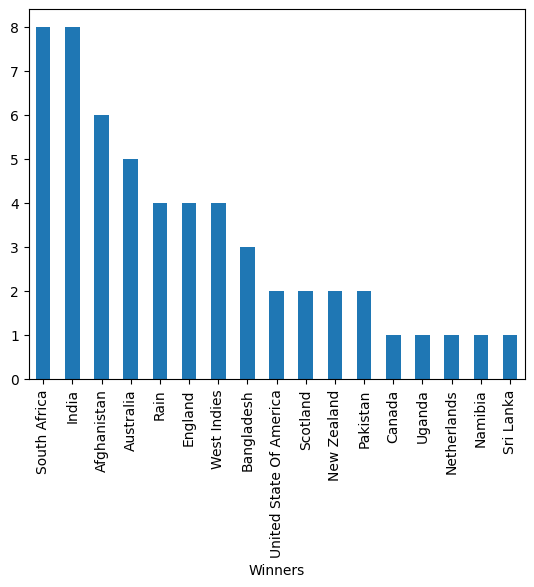

In [7]:
df1["Winners"].value_counts().sort_values(ascending=False).plot(kind="bar")

### Question 2
> which team has won the more toss in t20 worldcup 2024 ?

<Axes: ylabel='Toss_Winning'>

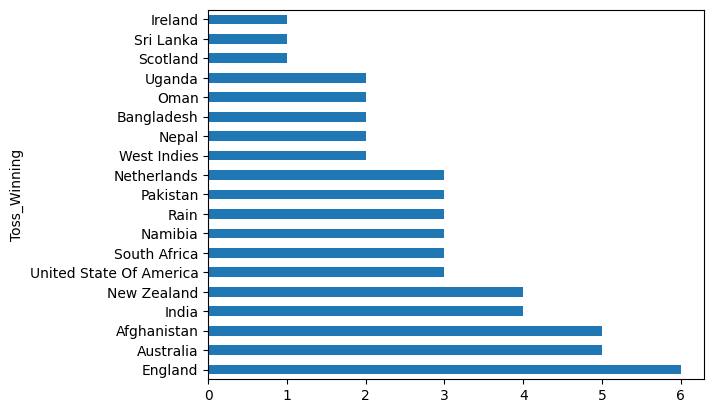

In [8]:
df1["Toss_Winning"].value_counts().plot(kind="barh")

## Question 3
> Did the team that won the toss also win the match?

In [9]:
df1[(df1.Toss_Winning == df1.Winners)]

,Match_No.,Date,Venue,1st_Team,2nd_Team,Stage,Toss_Winning,Toss_Decision,First_Innings_Score,Fall_of_wickets_First_Innings,...,Winners,Method,Won_by,Winning_Margin,Top_Scorer,Highest_Score,Best_Bowler,Best_Bowler_Figure(Wickets_Taken),Best_Bowler_Figure(Runs_Recieved),Player_Of_The_Match
0,1st,"Saturday,June 1,2024","Grand Prairie Stadium, Dallas",Canada,United State Of America,Group A,United State Of America,Fielding,194,5,...,United State Of America,Normal Match,Wickets,7,Aaron Jones,94,Dilon Heyliger,1,19,Aaron Jones
1,2nd,"Sunday,June 2,2024","Providence Stadium, Guyana",Papua New Guinea,Afghanistan,Group C,Afghanistan,Fielding,95,10,...,Afghanistan,Normal Match,Wickets,7,Gulbadin Naib,49,Fazalhaq Farooqi,3,16,Fazalhaq Farooqi
2,3rd,"Sunday,June 2,2024","Kensington Oval, Bridgetown, Barbados",Oman,Namibia,Group B,Namibia,Fielding,109,10,...,Namibia,Normal Match,Wickets,4,Jan Frylinck,45,Mehran Khan,3,7,David Wiese
6,7th,"Tuesday,June 4,2024","Grand Prairie Stadium, Dallas",Nepal,Netherlands,Group D,Netherlands,Fielding,106,10,...,Netherlands,Normal Match,Wickets,6,Max O'Dowd,54,Tim Pringle,3,20,Tim Pringle
7,8th,"Wednesday,June 5,2024","Nassau County International Cricket Stadium, N...",Ireland,India,Group A,India,Fielding,96,10,...,India,Normal Match,Wickets,8,Rohit Sharma,52,Jasprit Bumrah,2,6,Jasprit Bumrah
8,9th,"Wednesday,June 5,2024","Providence Stadium, Guyana",Papua New Guinea,Uganda,Group C,Uganda,Fielding,77,10,...,Uganda,Normal Match,Wickets,3,Riazat Ali Shah,33,Alpesh Ramjani,17,17,Riazat Ali Shah
10,11th,"Thursday,June 6,2024","Grand Prairie Stadium, Dallas",Pakistan,United State Of America,Group A,United State Of America,Fielding,159,7,...,United State Of America,Normal Match,Runs,1,Monank Patel,50,Nosthush Kenjige,30,30,Monank Patel
14,15th,"Friday,June 7,2024","Grand Prairie Stadium, Dallas",Sri Lanka,Bangladesh,Group D,Bangladesh,Fielding,124,9,...,Bangladesh,Normal Match,Wickets,2,Pathum Nissanka,47,Rishad Hossain,3,22,Rishad Hossain
15,16th,"Saturday,June 8,2024","Nassau County International Cricket Stadium, N...",Netherlands,South Africa,Group D,South Africa,Fielding,103,9,...,South Africa,Normal Match,Wickets,4,David Miller,59,Ottneil Baartman,4,11,David Miller
17,18th,"Saturday,June 8,2024","Providence Stadium, Guyana",West Indies,Uganda,Group C,West Indies,Batting,173,5,...,West Indies,Normal Match,Runs,134,Johnson Charles,44,Akeal Hosein,5,11,Akeal Hosein


> what is the percentage of toss winner will be a match winner?

In [10]:
(df1[(df1.Toss_Winning == df1.Winners)].shape[0]/df1.shape[0])*100

56.36363636363636

## Question 4
> which team has won thet20 worldcup tiltle ?

In [11]:
df1[(df1.Stage == "Final")][["1st_Team","2nd_Team","Winners"]]

,1st_Team,2nd_Team,Winners
54,India,South Africa,India


## Question 5
> which types of runs is scored most?

In [12]:
runs = df["runs_of_bat"].value_counts().reset_index()[1:]
runs

,runs_of_bat,count
1,1,3680
2,4,983
3,2,698
4,6,520
5,3,50
6,5,2


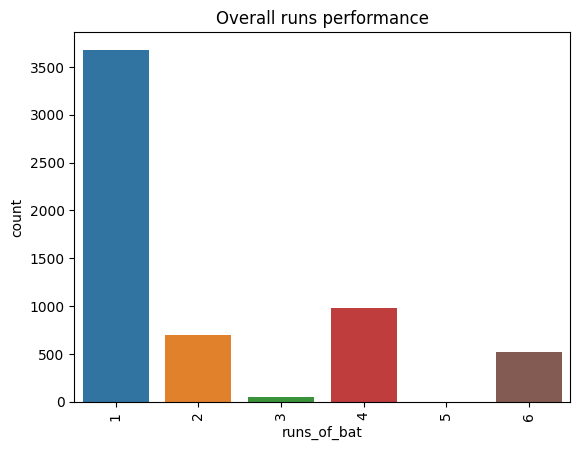

In [13]:
sns.barplot(data=runs,x="runs_of_bat",y='count')
plt.xticks(rotation=90)
plt.title('''Overall runs performance''')
plt.show()

## Question no 6
> How has the situation been when getting out?

In [14]:
df["wicket_type"].value_counts().reset_index()

,wicket_type,count
0,caught,427
1,bowled,136
2,lbw,75
3,runout,39
4,stumped,15
5,retired hurt,1


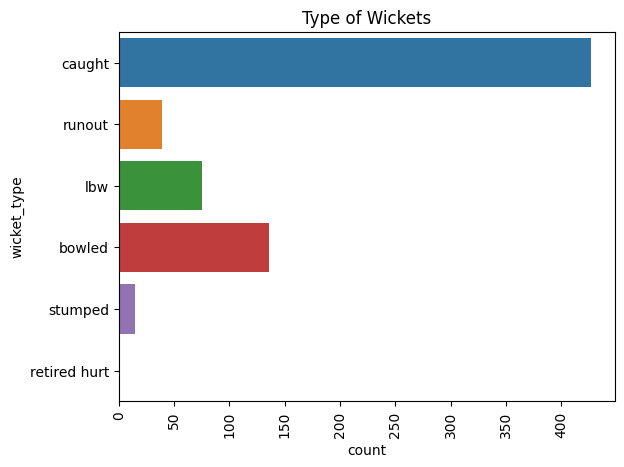

In [15]:
sns.countplot(data=df,y='wicket_type')
plt.xticks(rotation=90)
plt.title('''Type of Wickets''')
plt.show()

## Question no 7
> Which player hits most sixes in this tournament ?

In [16]:
most_sixes = df[(df.runs_of_bat == 6)]
most_sixes = most_sixes.groupby("striker")["runs_of_bat"].size().sort_values(ascending=False).reset_index().head(10)
most_sixes

,striker,runs_of_bat
0,Pooran,17
1,Gurbaz,16
2,Head,15
3,Rohit,15
4,Aaron Jones,14
5,Klaasen,13
6,de Kock,13
7,Gous,11
8,Philip Salt,10
9,Suryakumar Yadav,10


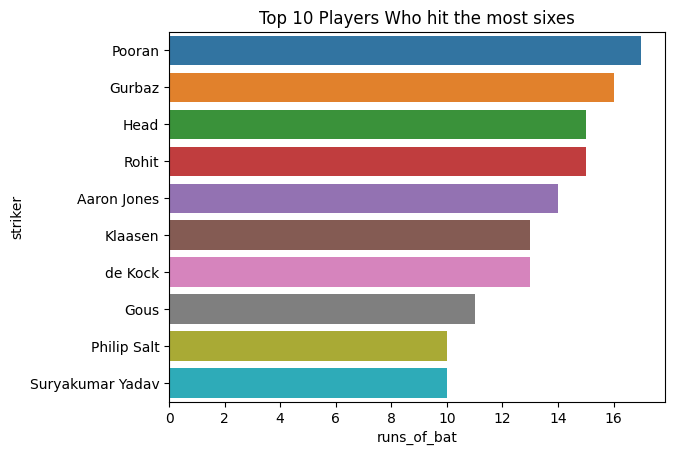

In [17]:
sns.barplot(y="striker",x="runs_of_bat",data=most_sixes)
plt.title('Top 10 Players Who hit the most sixes')
plt.show()

## Question 8
> Which Batsman Scored The Most Runs ?

In [18]:
most_runs  = df.groupby("striker")["runs_of_bat"].sum().sort_values(ascending=False).reset_index().head(10)
most_runs

,striker,runs_of_bat
0,Gurbaz,281
1,Rohit,257
2,Head,255
3,de Kock,248
4,Ibrahim Zadran,233
5,Pooran,228
6,Gous,219
7,Buttler,214
8,Suryakumar Yadav,199
9,Klaasen,190


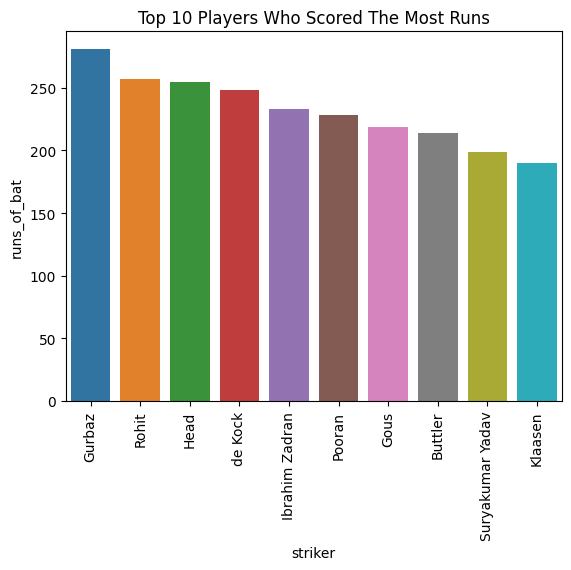

In [19]:
sns.barplot(x="striker",y="runs_of_bat",data=most_runs)
plt.title('Top 10 Players Who Scored The Most Runs')
plt.xticks(rotation=90)
plt.show()

## Question 9
> "Which bowler has conceded the most runs?

In [20]:
bowler = df.groupby("bowler")["runs_of_bat"].sum().sort_values(ascending=False).reset_index().head(10)
bowler

,bowler,runs_of_bat
0,Marco Jansen,207
1,Rabada,201
2,Arshdeep Singh,194
3,Nortje,193
4,Zampa,186
5,Jofra Archer,185
6,Rishad Hossain,184
7,Hardik Pandya,184
8,Adil Rashid,179
9,Maharaj,178


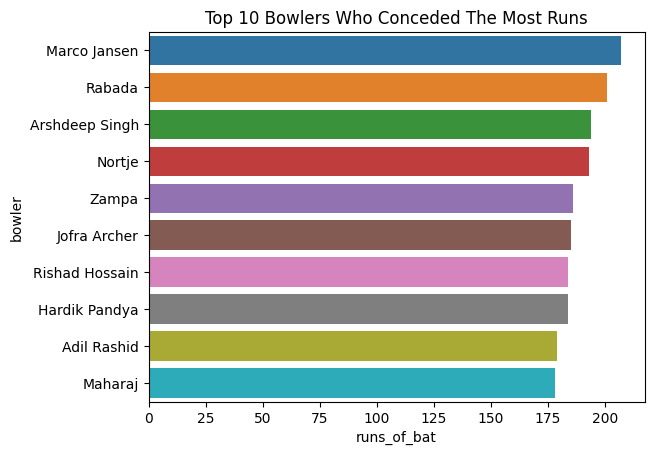

In [21]:
sns.barplot(y="bowler",x="runs_of_bat",data=bowler)
plt.title('Top 10 Bowlers Who Conceded The Most Runs')
plt.show()

## Question 10
> Which Player Has Won The Most Man Of The Match Title ?

In [22]:
man_of_the_match = df1.groupby("Player_Of_The_Match")["Match_No."].count().sort_values(ascending=False).reset_index().head(11)[1:]
man_of_the_match.rename(columns={"Match_No." : "Num_win"},inplace=True)
man_of_the_match

,Player_Of_The_Match,Num_win
1,Fazalhaq Farooqi,3
2,Adil Rashid,2
3,Adam Zampa,2
4,Quinton de Kock,2
5,Tabraiz Shamsi,2
6,Marcus Stoinis,2
7,Jasprit Bumrah,2
8,Aaron Jones,1
9,Rishad Hossain,1
10,Phil Salt,1


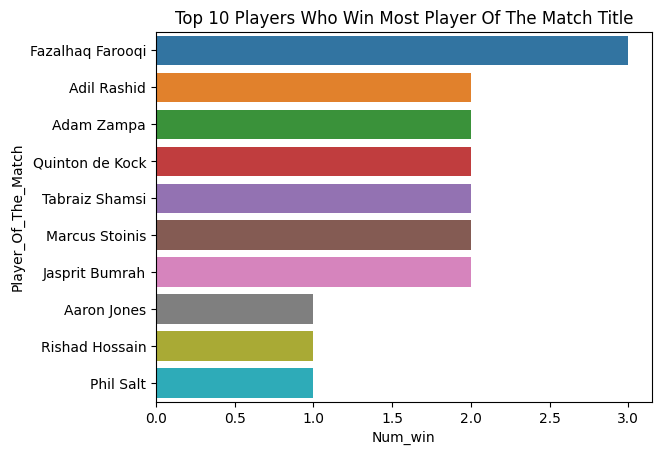

In [23]:
sns.barplot(y="Player_Of_The_Match",x="Num_win",data=man_of_the_match)
plt.title('Top 10 Players Who Win Most Player Of The Match Title')
plt.show()

#### if you like this notebook so please upvote

### Thanks